In [27]:
import os
import sys
from PIL import Image, ExifTags
import pprint
import requests
from collections import defaultdict
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import operator
import datetime
import pandas as pd
from math import pi
import numpy as np

<h1>1 Part(a)</h1>

In [2]:
def func_name(name):
    MAC_URL = 'http://macvendors.co/api/%s'
    r = requests.get(MAC_URL % name)
#     pprint.pprint(r.json())
    return (r.json()['result']['company'])

In [3]:
company = defaultdict(lambda : 0)
company1 = defaultdict(lambda : 0)


directory = './Isis Admin\'s Hacked Phones/'


for file in os.listdir(directory):
    first_level = directory + file
    for files in os.listdir(first_level):
        second_level = first_level + "/" + files
        for f in os.listdir(second_level):
            if f.endswith("Snapshots") or f.endswith("snapshots") or f.endswith("snapshot") or f.endswith("Snapshot") :
                third_level = second_level+"/" + f
                for filess in os.listdir(third_level):
                    try:
                        img = Image.open(os.path.join(third_level, filess))
                        exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
                        if(exif["Make"]):
                            company[exif["Make"].rstrip('\x00').lower()] += 1
                        else:
                            company["Unknown"] += 1
                        break
                    except:
                        
                        f = open(os.path.join(second_level,"ifconfig.txt"))
                        name = func_name((" ").join(f.readlines()).split("Name         : wlan0 - wlan0")[1].split("IPv4 Address")[0].split(": ")[1].strip("\n "))
                        company[name.split(" (")[0].lower()] += 1

                        break
                break
            
            elif f == "ifconfig.txt" or f == "ifconfig":
                fo = open(os.path.join(second_level, f))
                

                try:
                    var = (" ").join(fo.readlines()).split("Name         : wlan0 - wlan0")[1].split("IPv4 Address")[0].split(": ")[1].strip("\n ")
                    if len(var) == 17:
                        name = func_name(var)
                        company[name.split(" (")[0].lower()] += 1
                    elif len(var) == 55:
                        name = func_name(var.split("\n")[0])
                        company[name.split(" (")[0].lower()] += 1
                except:
                    pass


for i in company:
    if len(i.split(" ")) > 1:
        company1[i.split()[0]]+= company[i]
    else:
        company1[i] = company[i]


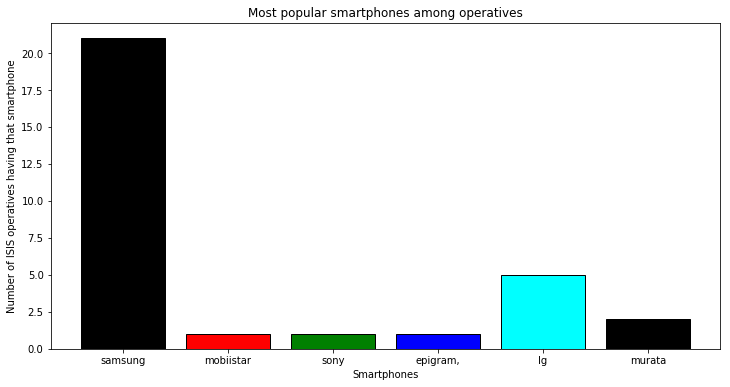

In [4]:
figure(figsize=(12,6))
plt.bar(company1.keys(), company1.values(), align='center',color=['black', 'red', 'green', 'blue', 'cyan'],edgecolor='black')
plt.title('Most popular smartphones among operatives')
plt.xlabel("Smartphones")
plt.ylabel("Number of ISIS operatives having that smartphone")
plt.show()


<h1>1 Part(b)</h1>

In [5]:
log_list = []
outgoing = defaultdict(lambda: 0)
incoming = defaultdict(lambda: 0)
# num_dict
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".txt"):
            name = os.path.join(root,file)
            if name[-17:] == '/Calllog Dump.txt':
                log_list.append(name)

                
for files in log_list:
    f = open(files)
    var = ''.join(f.readlines()).split("\n")
    for idx, val in enumerate(var):
        if val.startswith("Number"):
            if var[idx+3].strip("\n").split(": ")[1].lower() == 'outgoing':
                country = f.name.split("/")[2].split(" ")[0]
                index = (var[idx].strip("\n").split(": ")[1],var[idx+1].strip("\n").split(": ")[1].lower(),country)
                outgoing[index] += 1
            if var[idx+3].strip("\n").split(": ")[1].lower() == 'incoming':
                country = f.name.split("/")[2].split(" ")[0]
                index = (var[idx].strip("\n").split(": ")[1],var[idx+1].strip("\n").split(": ")[1].lower(),country)
                incoming[index] += 1



In [6]:
arr = sorted(outgoing.items(), key=operator.itemgetter(1))[-5:]
arr1 = sorted(incoming.items(), key=operator.itemgetter(1))[-5:]

print("Top 5 most popular outgoing numbers are :")
for key,value in arr:
    
    print("Number : " + key[0] + " Name : " + key[1] + " Country : " + key[2] + " ==> " + str(value))
    



Top 5 most popular outgoing numbers are :
Number : 7006348792 Name : masroor Country : India ==> 189
Number : 123 Name : null Country : India ==> 215
Number : +917780809871 Name : adal bhat Country : India ==> 237
Number : 0933637039 Name : جدي ندى Country : Turkey ==> 250
Number : 00966550326715 Name : null Country : Yemen ==> 264


<h1>1 Part(c)</h1>

In [7]:
print("Top 5 most popular incoming numbers are :")
for key,value in arr1:
    
    print("Number : " + key[0] + " Name : " + key[1] + " Country : " + key[2] + " ==> " + str(value))
    

Top 5 most popular incoming numbers are :
Number : +917780809871 Name : adal bhat Country : India ==> 104
Number : +963997421993 Name : هتلر Country : Syria ==> 130
Number : +917780848045 Name : musaib dhurani Country : India ==> 159
Number : MTN Name : null Country : Syria ==> 229
Number : Syriatel Name : null Country : Syria ==> 367


<h1>1 Part(d)</h1>

In [8]:
rel_list = []
countries = ['yemen','syria','india']
for root, dirs, files in os.walk(directory):
    
    for file in files:
        if file.endswith(".txt"):
            name = os.path.join(root,file)
            country = name.split("/")[2].split(" ")[0]
            if name[-17:] == '/Calllog Dump.txt' and (country.lower() in countries):
                rel_list.append(name)

time = []   
for files in rel_list:
    f = open(files)
    country = f.name.split("/")[2].split(" ")[0]
    var = ''.join(f.readlines()).split("\n")
    for idx, val in enumerate(var):
        if val.startswith("Date"):
            try:
                time.append((country,val.split(" ")[4]))
            except:
                pass


In [9]:
india = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
yemen = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
syria = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}

for var in time:
    if var[0].lower() == 'india':
        times = var[1].split(":")
        times = [int(x) for x in times]
        temp = datetime.timedelta(hours=times[0], minutes=times[1], seconds=times[2]) + datetime.timedelta(hours=5, minutes=30)
        if str(temp).startswith("1 day"):
            india[int(str(temp).split(", ")[1].split(":")[0])] += 1
        else:
            india[int(str(temp).split(":")[0])] += 1
    elif var[0].lower() == 'syria':
        times = var[1].split(":")
        times = [int(x) for x in times]
        temp = datetime.timedelta(hours=times[0], minutes=times[1], seconds=times[2]) + datetime.timedelta(hours=2)
        if str(temp).startswith("1 day"):
            syria[int(str(temp).split(", ")[1].split(":")[0])] += 1
        else:
            syria[int(str(temp).split(":")[0])] += 1
    elif var[0].lower() == 'yemen':
        times = var[1].split(":")
        times = [int(x) for x in times]
        temp = datetime.timedelta(hours=times[0], minutes=times[1], seconds=times[2]) + datetime.timedelta(hours=3)
        if str(temp).startswith("1 day"):
            yemen[int(str(temp).split(", ")[1].split(":")[0])] += 1
        else:
            yemen[int(str(temp).split(":")[0])] += 1
            

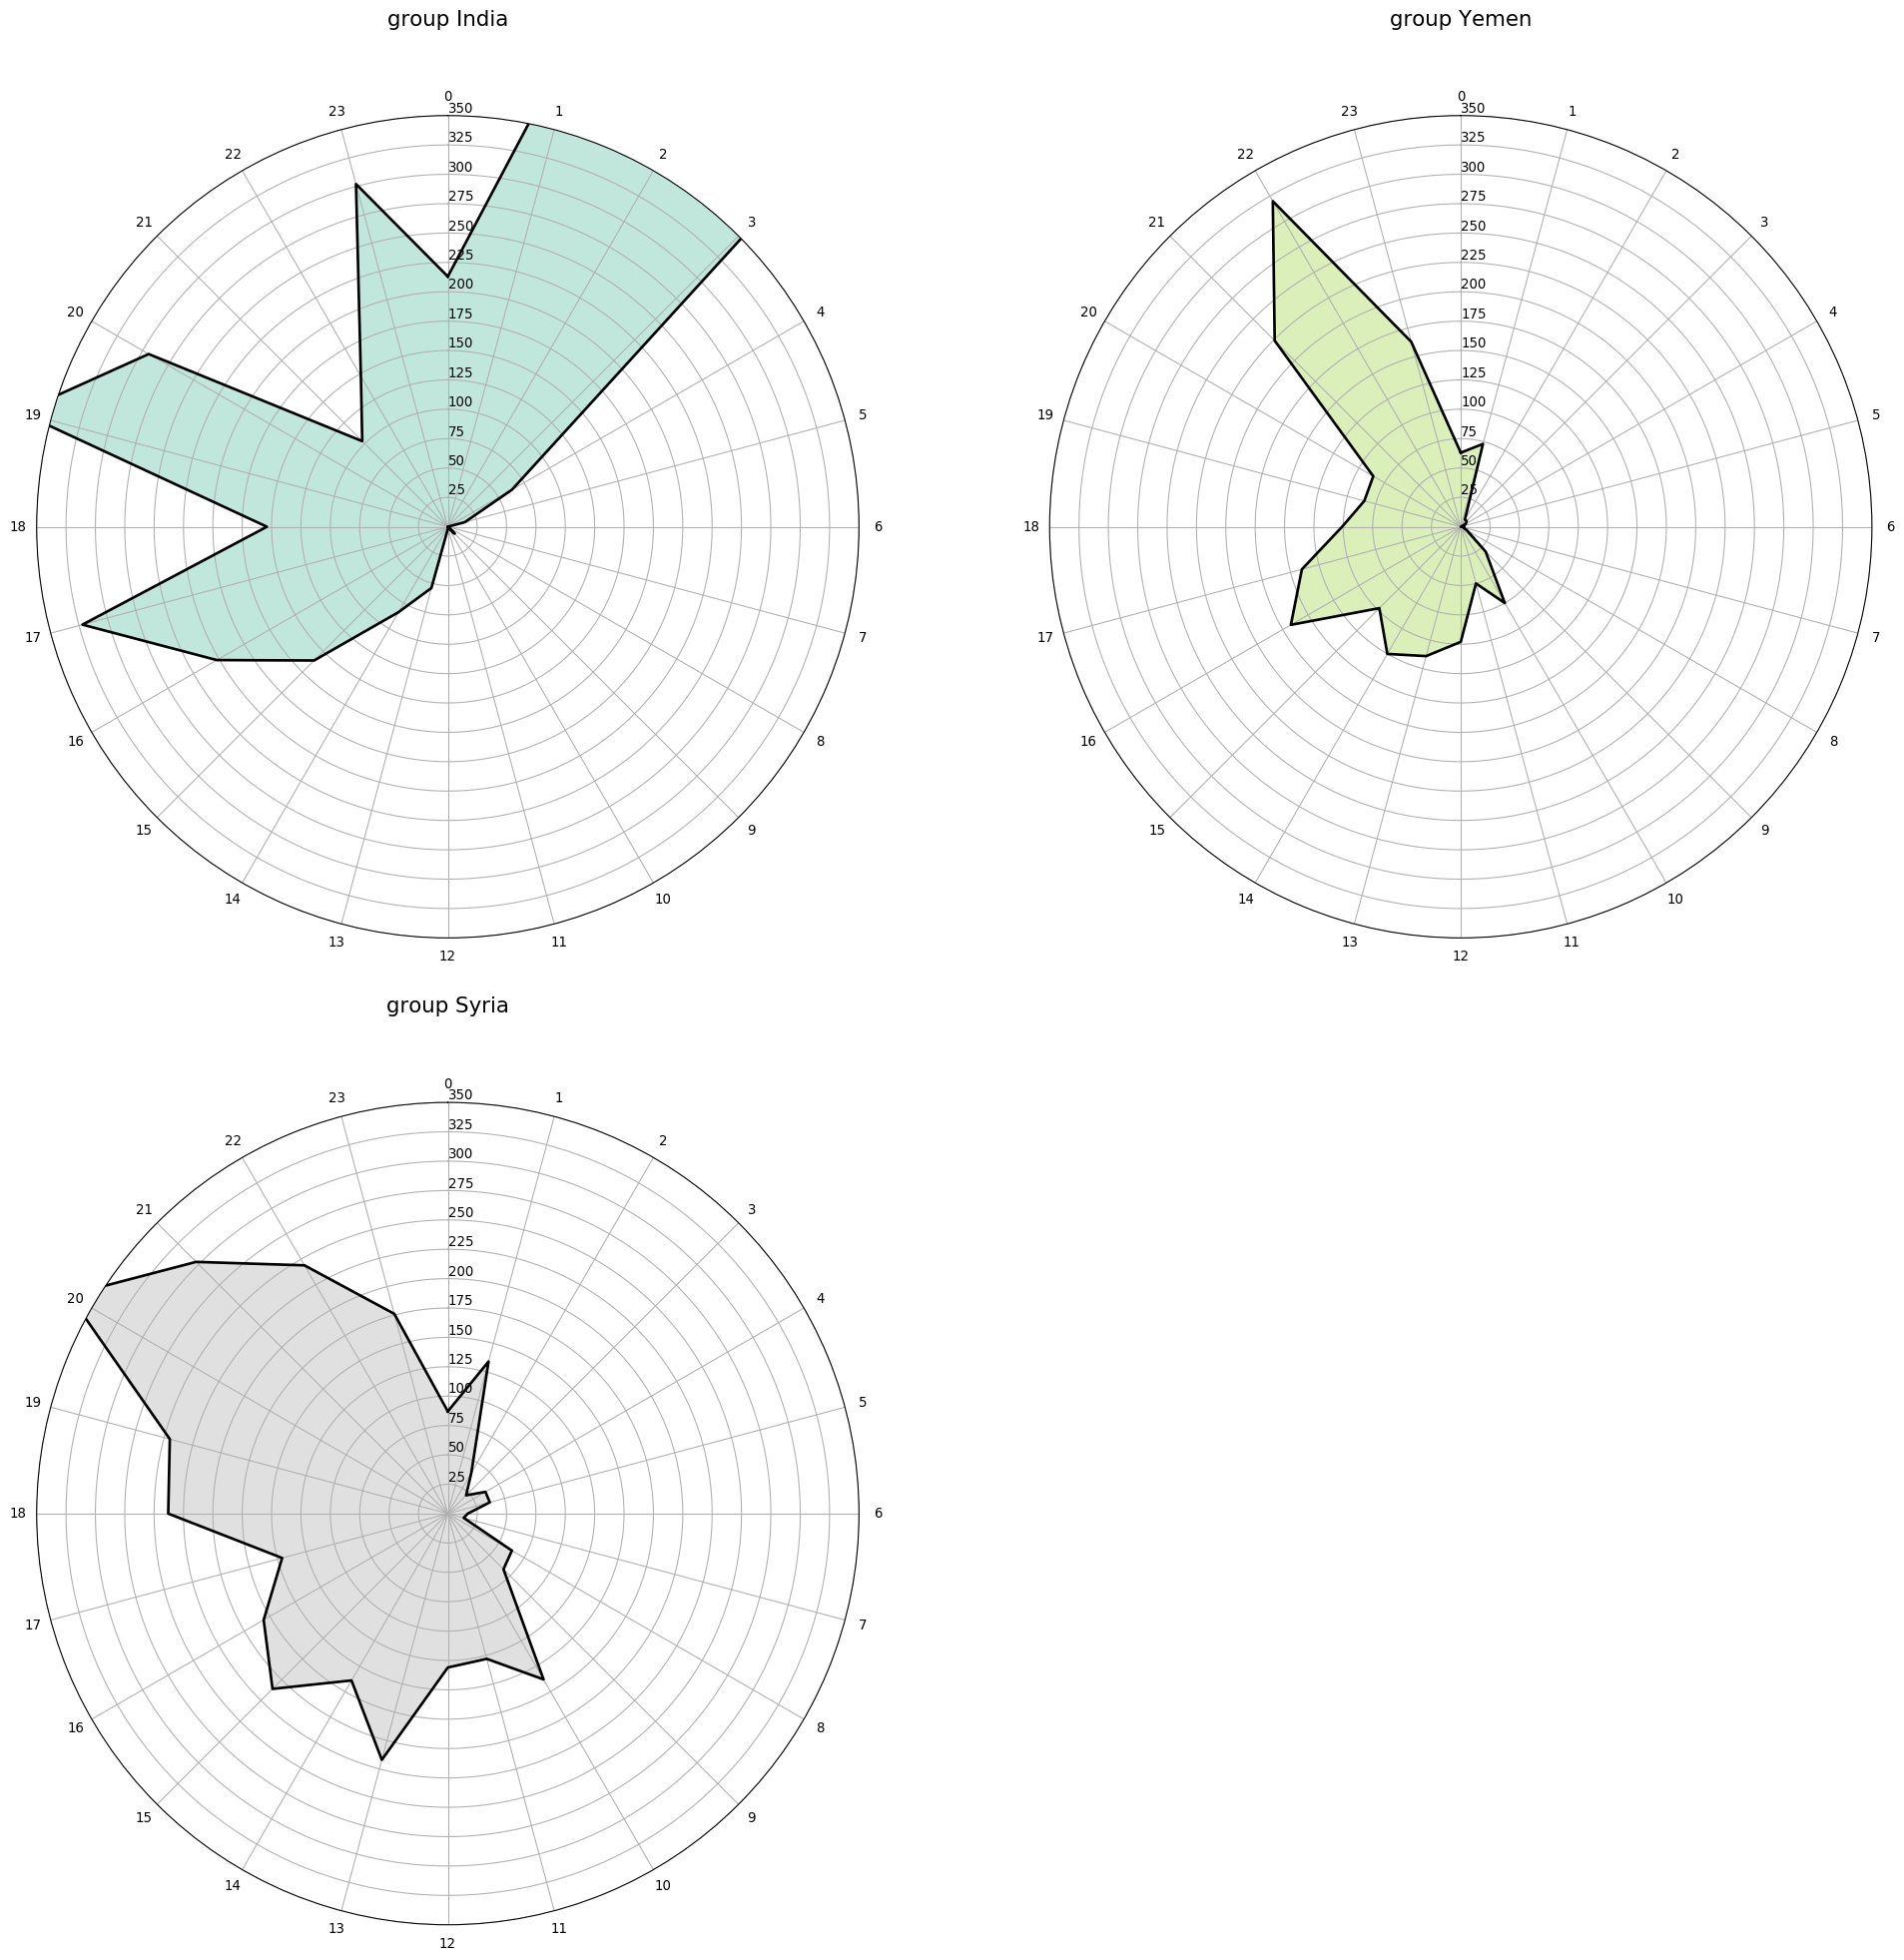

In [10]:
# Set data
df = pd.DataFrame({
'group': ['India','Yemen','Syria'],
'0':  [india[0],yemen[0],syria[0]],
'1':  [india[1],yemen[1],syria[1]],
'2':  [india[2],yemen[2],syria[2]],
'3':  [india[3],yemen[3],syria[3]],
'4':  [india[4],yemen[4],syria[4]],
'5':  [india[5],yemen[5],syria[5]],
'6':  [india[6],yemen[6],syria[6]],
'7':  [india[7],yemen[7],syria[7]],
'8':  [india[8],yemen[8],syria[8]],
'9':  [india[9],yemen[9],syria[9]],
'10':  [india[10],yemen[10],syria[10]],
'11':  [india[11],yemen[11],syria[11]],
'12':  [india[12],yemen[12],syria[12]],
'13':  [india[13],yemen[13],syria[13]],
'14':  [india[14],yemen[14],syria[14]],
'15':  [india[15],yemen[15],syria[15]],
'16':  [india[16],yemen[16],syria[16]],
'17':  [india[17],yemen[17],syria[17]],
'18':  [india[18],yemen[18],syria[18]],
'19':  [india[19],yemen[19],syria[19]],
'20':  [india[20],yemen[20],syria[20]],
'21':  [india[21],yemen[21],syria[21]],
'22':  [india[22],yemen[22],syria[22]],
'23':  [india[23],yemen[23],syria[23]],

})
 
 
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100,125,150,175,200,225,250,275,300,325,350,375], ["25","50","75","100","125","150","175","200","225","250","275","300","325","350","375"], color="black", size=10)
    plt.ylim(0,350)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color='Black', linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color='Black', y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(25,25), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))




<h1>1 Part(e)</h1>

In [24]:
total_calls = []
duration = defaultdict(lambda: 0)
total = defaultdict(lambda: 0)
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".txt"):
            name = os.path.join(root,file)
            if name[-17:] == '/Calllog Dump.txt':
                total_calls.append(name)

                
for files in total_calls:
    f = open(files)
    country = f.name.split("/")[2].split(" ")[0]
    var = ''.join(f.readlines()).split("\n")
    for idx, val in enumerate(var):
        if val.startswith("Duration"):
            try:
                duration[country] += int(val.split(": ")[1])
                total[country] += 1
            except:
                pass
average = {}
for key in duration:
    
    average[key] = duration[key]/total[key]

[]

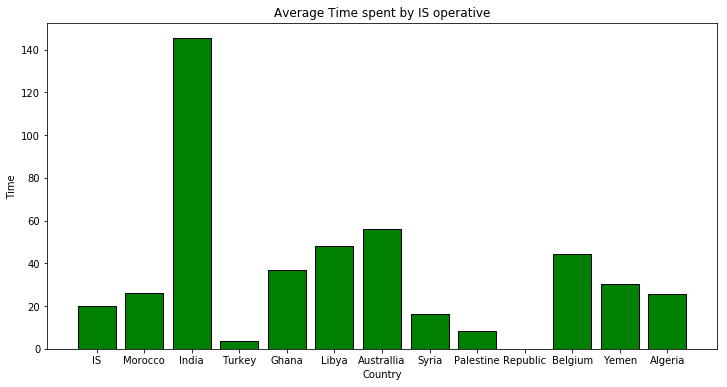

In [38]:
figure(figsize=(12,6))
plt.bar(average.keys(), average.values(), align='center',color='green',edgecolor='black')
plt.title('Average Time spent by IS operative')
plt.xlabel("Country")
plt.ylabel("Time")
plt.plot()

[]

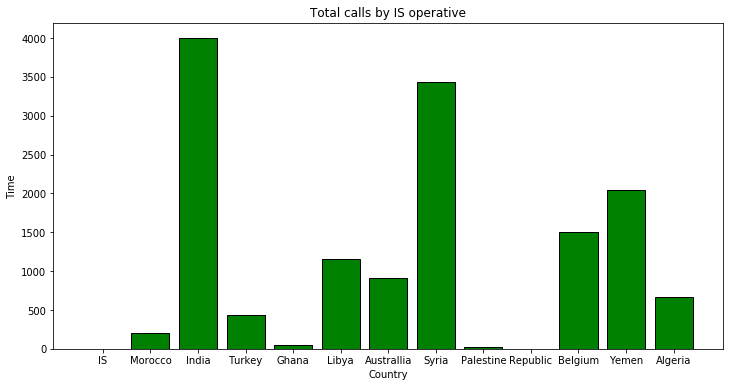

In [39]:
figure(figsize=(12,6))
plt.bar(total.keys(), total.values(), align='center',color='green',edgecolor='black')
plt.title('Total calls by IS operative')
plt.xlabel("Country")
plt.ylabel("Time")
plt.plot()